# Earth's lithospheric motions

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   9th of January 2024

## Exercise 3: Present Euler vector: rigidity and deformation

REVEL–2000 [Sella et al., 2002] is a global model of plate kinematics defined from geodetic data, in particular GPS time series. The model provides a set of Euler vectors for the present-day relative motion of the main tectonic plates. Specifically, to determine the movement of the Nazca plate (NZ) and South America (SA), the GPS stations marked with red dots in the figure below (Figure 2 in exercise paper) have been used. On the other hand, Norabuena et al. (1998) reports surface velocities obtained in situ from GPS stations located in the locations indicated by the blue dots in the figure below.

Perform the following exercises:

1. Using the REVEL model, calculate the Euler vector that defines the motion of South America with respect to Nazca ($\omega_{SA/NZ}$) in Cartesian coordinates. Know that the Euler vectors relative to a common reference (ITRF in this case), can be used to calculate the relative motion of plate A with respect to plate B as follows:
$$\omega_{A/B} = \omega_{A/ITRF} - \omega_{B/ITRF}$$

2. Calculate the surface velocities of South America relative to Nazca in the same coordinates as the ones used by Norabuena (blue points in figure below). For this use the vector $\omega_{SA/NZ}$ calculated from the REVEL model in the previous section.

3. How do the results of the previous point compare with the measurements reported in Norabuena et al. (1998)? If you find differences in surface velocity, think about possible explanations.

<br>

***
References:  
- E. Norabuena, L. Leffler-Griffin, A. Mao, T. Dixon, S. Stein, I. S. Sacks, L. Ocola, and M. Ellis. *Space geodetic observations of Nazca-South America convergence across the Central Andes.* Science, 279(5349):358–362, 1998.
- G. F. Sella, T. H. Dixon, and A. Mao. *Revel: A model for recent plate velocities from space geodesy.* Journal of Geophysical Research, 107:B42081, 2002.


In [2]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_SCRIPTS = '/content/gdrive/MyDrive/2024-Geodynamics/01_PLATE_MOTIONS/SCRIPTS'


# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)


from map_dependencies import basic_map
from surfvel_dependencies import ev_to_surfvel_eastnorth

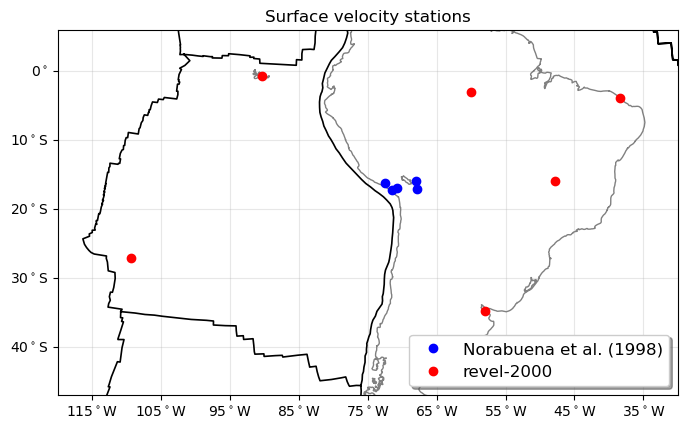

In [4]:
# Declare and stora data in Dataframe objects
norabuena_df = pd.DataFrame({"lon": [-72.5, -68.0, -71.5, -70.8, -67.8],
                             "lat": [-16.3, -16.0, -17.3, -16.95, -17.1]})

revel_df = pd.DataFrame({"lon": [-90.3, -109.38, -14.41, -47.88, -38.43, -57.93, -60.06],
                         "lat": [-0.74, -27.15, -7.95, -15.95, -3.88, -34.91, -3.12]})
  
  
# Create map
fig, ax = basic_map(figsize=(8,8),
                    xlim=(-120, -30),
                    ylim=(-47, 6))
  
# Plot data                         
ax.plot(norabuena_df["lon"], norabuena_df["lat"], "ob", label="Norabuena et al. (1998)")
ax.plot(revel_df["lon"], revel_df["lat"], "or", label="revel-2000")
ax.set_title("Surface velocity stations")
ax.legend(loc="lower right", fontsize=12, shadow=True);  

We start by uploading the data the model revel-2000 from Sella et al. (2002). 

In [5]:
revel_path = os.path.join(path_to_data, "REVEL_SELLA2002_TABLE3.txt")
revel_ev_df = pd.read_csv(revel_path, delimiter=' ', index_col=0)
revel_ev_df

,wX,wY,wZ,cxx,cxy,cxz,cyy,cyz,czz
Plate_ID,,,,,,,,,
Am,-0.001747,-0.001824,0.005122,0.857324,-1.063607,-1.096796,1.347375,1.378061,1.438827
An,-0.001431,-0.001482,0.003358,0.002206,0.000481,-0.001042,0.005049,-0.008574,0.028016
Ar,0.005653,0.000286,0.007109,0.110933,0.107269,0.082829,0.111556,0.083046,0.072361
At,0.010232,0.005029,0.010336,101.943568,65.724799,100.431138,42.396490,64.759834,98.973900
Au,0.007046,0.005558,0.006251,0.009488,-0.009391,0.007173,0.012160,-0.008208,0.009718
Ca,-0.000056,-0.003751,0.002903,0.029068,-0.061974,0.019386,0.144467,-0.044556,0.020405
Cs,-0.001131,-0.003248,0.004836,0.253516,-0.454367,-0.297816,0.831822,0.542589,0.366409
Eu,-0.000500,-0.002309,0.003821,0.002968,0.000972,0.004096,0.000727,0.001536,0.007045
In,0.004853,-0.001209,0.006795,0.064093,0.289369,0.072830,1.335119,0.335702,0.088999


For the purpose of this exercise, we will only use the average Euler vector, i.e. we will ignore uncertainties. Effectively, we will ignore the given covariance matrix elements (cxx, cxy, ..., czz).

The Euler vectors are given as cartesian coordinates in rad/Myr (radians per million years). We will start by converting them to deg/Myr (degrees per million years) for convenience later on.

In [6]:
vec_Nz = revel_ev_df.loc["Nz"][["wX","wY","wZ"]] * (180/np.pi)     # Euler vector in cartesian coordinates for the Nazca plate [deg/Myr]
vec_Sa = revel_ev_df.loc["Sa"][["wX","wY","wZ"]] * (180/np.pi)     # Euler vector in cartesian coordinates for the South-America plate [deg/Myr]
vec_Sa

wX   -0.068175
wY   -0.067279
wZ   -0.046355
Name: Sa, dtype: float64

Cartesian coordinates allow us to directly work algebraically with them to obtain the vector of relative motion between Sa/Nz:
$$\omega_{SA/NZ} = \omega_{ITRF/SA} - \omega_{ITRF/NZ}$$

In [7]:
vec_SaNz = vec_Sa - vec_Nz
vec_SaNz

wX    0.008023
wY    0.388346
wZ   -0.499579
dtype: float64

The next step is to take this Euler vector and calculate the relative velocity in the same coordinates as those used by Norabuena for the South American plate. For this we will use the function `ev_to_surfvel_eastnorth` from the `surfvel_dependencies` module imported above. This function takes as input an Euler vector and the coordinates of the point where we want to calculate the surface velocity. In turn, it returns the velocity, expressed in its East and North components.

You can request more details about the function by typing `?ev_to_surfvel_eastnorth` as in the cell below.

In [8]:
?ev_to_surfvel_eastnorth

Signature: ev_to_surfvel_eastnorth(ev_cart, pnt_lon, pnt_lat)
Docstring:
Calculates the east and north components of the surface velocity for
a given spherical coordinate in the globe, and an Euler vector.

Parameters
----------
ev_cart : list or array
    Cartesian coordinates of the Euler vector (wx, wy, wz) in [deg/Myr].
lat_deg : float or int
    Spherical latitude of a point on the Earth surface, in [degrees].
lon_deg : float or int
    Spherical longitude of a point on the Earth surface, in [degrees].

Returns
-------
v_east, v_north
    East and north components of the surface velocity in [cm/yr].
File:      c:\users\nbt571\documents\phd\teaching\2024-geodynamics\gses-vsef\scripts\dependencies\surfvel_dependencies.py
Type:      function

In [9]:
lon_pnts = [0.0, 0.0, 0.0, 0.0, 0.0]      # Fill with the coordinates of the Norabuena points (blue dots)!
lat_pnts = [0.0, 0.0, 0.0, 0.0, 0.0]

lon_pnts = [-72.5, -68.0, -71.5, -70.8, -67.8]      # Fill with the coordinates of the Norabuena points (blue dots)!
lat_pnts = [-16.3, -16.0, -17.3, -16.95, -17.1]


# Here we will store the results
N_pnts = len(lon_pnts)
revel_surfvel_df = pd.DataFrame(data=dict(lon_pt = lon_pnts,
                                          lat_pt = lat_pnts,
                                          v_east = np.zeros(N_pnts),
                                          v_north = np.zeros(N_pnts)))

v_total = np.zeros(N_pnts)

# We will iterate over each point, calculate the surface velocity components and store them in the DataFrame object "revel_surfvel_df"
for i in range(N_pnts):
    v_east, v_north = ev_to_surfvel_eastnorth(vec_SaNz,
                                              revel_surfvel_df["lon_pt"][i],
                                              revel_surfvel_df["lat_pt"][i])

    revel_surfvel_df["v_east"][i], revel_surfvel_df["v_north"][i] = v_east, v_north      # The output velocity in terms of east and north components in [cm/yr]

In [11]:
revel_surfvel_df

,lon_pt,lat_pt,v_east,v_north
0,-72.5,-16.30,-6.480136,-1.383592
1,-68.0,-16.00,-6.434250,-1.700343
2,-71.5,-17.30,-6.513109,-1.454788
3,-70.8,-16.95,-6.494090,-1.504363
4,-67.8,-17.10,-6.475185,-1.714192


How do these results compare to those obtained by Norabuena for in-situ measurements of the relative motion between South America and Nazca?

In [12]:
norab_surfvel_df = pd.DataFrame(data=dict(v_east  = [0.0, 0.0, 0.0, 0.0, 0.0],           # Fill with the velocity measurements from Norabuena!
                                          v_north = [0.0, 0.0, 0.0, 0.0, 0.0]))


norab_surfvel_df = pd.DataFrame(data=dict(v_east  = [-35.4, -50.4, -37.0, -43.0, -50.4],           # Fill with the velocity measurements from Norabuena!
                                          v_north = [-14.5, -20.4, -15.0, -18.0, -19.1]))


norab_surfvel_df

,v_east,v_north
0,-35.4,-14.5
1,-50.4,-20.4
2,-37.0,-15.0
3,-43.0,-18.0
4,-50.4,-19.1


Done with the calculations, we can move on to compare the results from both sources.

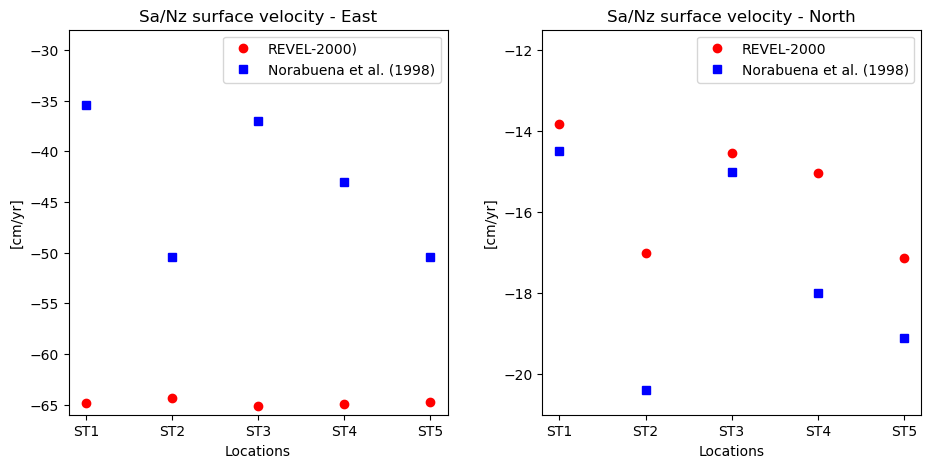

In [13]:
fig, ax = plt.subplots(1, 2, figsize =(11,5), gridspec_kw=dict(wspace=0.25))
ax[0].set(title = "Sa/Nz surface velocity - East",
          xlabel = "Locations",
          ylabel = "[cm/yr]",
          ylim = (-66, -28),
          xticks = np.arange(1,6),
          xticklabels = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5'],
          );

ax[1].set(title = "Sa/Nz surface velocity - North",
          xlabel = "Locations",
          ylabel = "[cm/yr]",
          ylim = (-21, -11.5),
          xticks = np.arange(1,6),
          xticklabels = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5'],
          );

ax[0].plot(np.arange(1, 6), revel_surfvel_df["v_east"]*1e1, 'or', label="REVEL-2000)")
ax[0].plot(np.arange(1, 6), norab_surfvel_df["v_east"], 'sb', label="Norabuena et al. (1998)")

ax[1].plot(np.arange(1, 6), revel_surfvel_df["v_north"]*1e1, 'or', label="REVEL-2000");
ax[1].plot(np.arange(1, 6), norab_surfvel_df["v_north"], 'sb', label="Norabuena et al. (1998)");

ax[0].legend();
ax[1].legend();


What can you say about the differences between the results (Norabuena and revel's)? Is there a difference between the East and North components? 

Hint! Bear in mind the particular location of the points chosen by Norabuena to measure the relative motion between South America and Nazca.